## Getting GDM running in R
Just following [the tutorial](https://mfitzpatrick.al.umces.edu/gdm/)

In [1]:
library(gdm)
library(terra)
library(colorRamps)

terra 1.8.42



# Load the bioclim rasters clipped to this region

[1] "bio_1"  "bio_10" "bio_11" "bio_12" "bio_13" "bio_14" "bio_15" "bio_16"
 [9] "bio_17" "bio_18" "bio_19" "bio_2"  "bio_3"  "bio_4"  "bio_5"  "bio_6" 
[17] "bio_7"  "bio_8"  "bio_9"

[1] 19

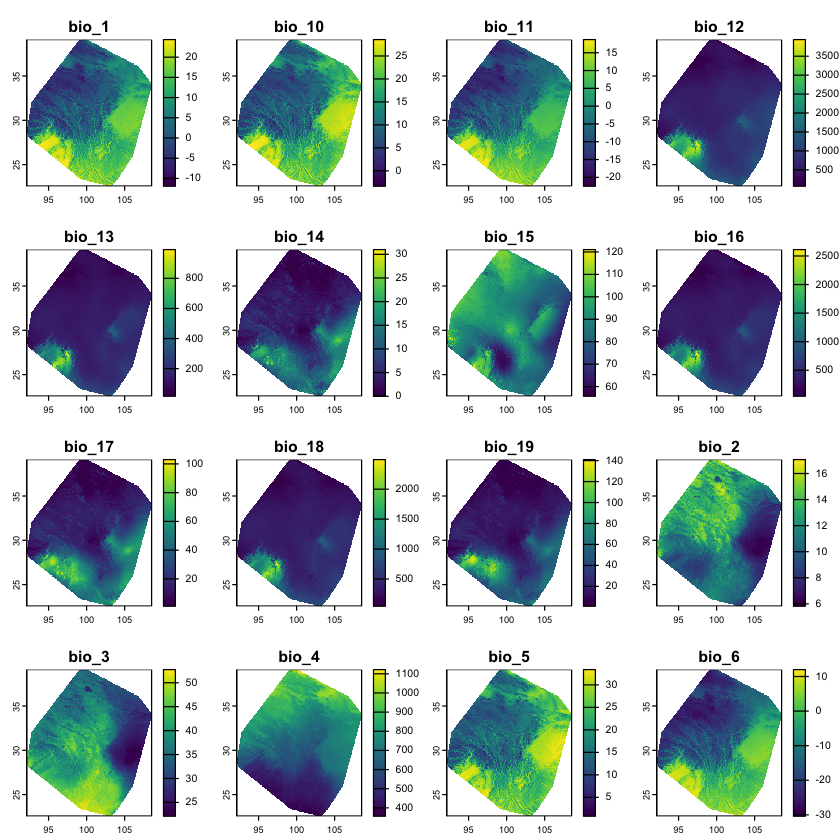

In [2]:
raster_files <- list.files(path = "../env_data/hengduan_wc30s", pattern = "\\.tif$", full.names = TRUE)

# Load them into a multi-layer SpatRaster
rasters <- rast(raster_files)

hengduan_bioclims <- terra::rast(rasters)

names(rasters)
nlyr(rasters)
plot(rasters)


## Pedicularis data - Use site x species matrix and bioclim rasters

In [3]:
matrixTab <- read.csv("site_species_matrix.csv")
head(matrixTab)

cluster Pedicularis_aff._amplituba Pedicularis_aff._sigmoidea
1 0       0                          0                         
2 1       0                          0                         
3 2       0                          1                         
4 3       0                          0                         
5 4       0                          0                         
6 5       0                          0                         
  Pedicularis_alaschanica Pedicularis_amplituba Pedicularis_anas
1 0                       0                     0               
2 0                       0                     1               
3 0                       0                     0               
4 0                       0                     1               
5 0                       0                     0               
6 0                       0                     0               
  Pedicularis_armata Pedicularis_aschistorrhyncha Pedicularis_axillaris
1 0                  0                            0                    
2 0                  0                            0                    
3 0                  0                            1                    
4 1                  0                            0                    
5 0                  0                            0                    
6 1                  0                            0                    
  Pedicularis_batangensis ⋯ Pedicularis_variegata Pedicularis_veronicifolia
1 0                       ⋯ 0                     0                        
2 0                       ⋯ 0                     0                        
3 0                       ⋯ 1                     0                        
4 0                       ⋯ 0                     0                        
5 0                       ⋯ 0                     0                        
6 0                       ⋯ 0                     0                        
  Pedicularis_verticillata Pedicularis_wanghongiae Pedicularis_wilsonii
1 0                        0                       0                   
2 0                        0                       0                   
3 0                        0                       0                   
4 1                        0                       0                   
5 0                        0                       0                   
6 0                        0                       0                   
  Pedicularis_yanyuanensis Pedicularis_yunnanensis Pedicularisobliquigaleata
1 0                        0                       0                        
2 0                        0                       0                        
3 0                        0                       0                        
4 0                        0                       0                        
5 0                        0                       0                        
6 0                        0                       0                        
  Latitude Longitude
1 29.53460  94.67542
2 31.92608 102.71725
3 27.10044 100.24694
4 34.07709 102.15136
5 30.16971 102.35762
6 32.69040 103.10305

In [4]:
hengduan_bioclims <- terra::rast(rasters)
gdmTab.rast <- formatsitepair(bioData=matrixTab, 
                              bioFormat=1, # site/species matrix
                              XColumn="Longitude", 
                              YColumn="Latitude", 
                              siteColumn="cluster",
                              predData=rasters) #raster stack

Warning message in formatsitepair(bioData = matrixTab, bioFormat = 1, XColumn = "Longitude", :
“When using rasters for environmental covariates (predictors), each site is assigned to the
              raster cell in which the site is located. If more than one site occurs within the same raster cell,
              the biological data of those sites are aggregated (more likely as raster resolution decreases).”


In [5]:
hengduan_bioclims

class       : SpatRaster 
dimensions  : 1986, 1970, 19  (nrow, ncol, nlyr)
resolution  : 0.008333333, 0.008333333  (x, y)
extent      : 92.125, 108.5417, 22.55833, 39.10833  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 

In [6]:
head(gdmTab.rast)

distance weights s1.xCoord s1.yCoord s2.xCoord s2.yCoord s1.bio_1 s1.bio_10
1   1.0      1       99.7375   38.39583  100.92083 37.80417  -3.6875  6.95     
1.1 0.5      1       99.7375   38.39583   99.95417 37.45417  -3.6875  6.95     
1.2 0.2      1       99.7375   38.39583  101.61250 37.03750  -3.6875  6.95     
1.3 1.0      1       99.7375   38.39583  102.10417 36.84583  -3.6875  6.95     
1.4 0.5      1       99.7375   38.39583  100.12083 36.52083  -3.6875  6.95     
1.5 1.0      1       99.7375   38.39583  102.61250 36.17917  -3.6875  6.95     
    s1.bio_11 s1.bio_12 ⋯ s2.bio_18 s2.bio_19 s2.bio_2 s2.bio_3 s2.bio_4
1   -14.81667 413       ⋯ 307       11        11.50000 31.16531 896.1606
1.1 -14.81667 413       ⋯ 259        5        13.54167 36.89827 835.4489
1.2 -14.81667 413       ⋯ 264        5        14.38333 36.59881 874.1251
1.3 -14.81667 413       ⋯ 262        6        12.90000 35.24590 847.5106
1.4 -14.81667 413       ⋯ 245        5        13.59167 37.23744 821.7925
1.5 -14.81667 413       ⋯ 291        6        10.30000 30.56380 826.2589
    s2.bio_5 s2.bio_6 s2.bio_7 s2.bio_8  s2.bio_9 
1   12.1     -24.8    36.9      5.550000 -15.08333
1.1 14.1     -22.6    36.7      7.766667 -11.53333
1.2 19.7     -19.6    39.3     12.466667  -7.90000
1.3 18.0     -18.6    36.6     11.666667  -9.15000
1.4 14.9     -21.6    36.5      8.550000 -10.63333
1.5 15.8     -17.9    33.7     10.166667 -10.26667

In [7]:
gdmRastMod <- gdm(data=gdmTab.rast, geo=TRUE)
summary(gdmRastMod)

[1] 
[1] 
[1] GDM Modelling Summary
[1] Creation Date:  Sat Jun  7 13:39:09 2025
[1] 
[1] Name:  gdmRastMod
[1] 
[1] Data:  gdmTab.rast
[1] 
[1] Samples:  11935
[1] 
[1] Geographical distance used in model fitting?  TRUE
[1] 
[1] NULL Deviance:  3176.883
[1] GDM Deviance:  1785.839
[1] Percent Deviance Explained:  43.786
[1] 
[1] Intercept:  0.42
[1] 
[1] PREDICTOR ORDER BY SUM OF I-SPLINE COEFFICIENTS:
[1] 
[1] Predictor 1: Geographic
[1] Splines: 3
[1] Min Knot: 0.218
[1] 50% Knot: 4.839
[1] Max Knot: 15.455
[1] Coefficient[1]: 0.281
[1] Coefficient[2]: 1.296
[1] Coefficient[3]: 1.055
[1] Sum of coefficients for Geographic: 2.632
[1] 
[1] Predictor 2: bio_7
[1] Splines: 3
[1] Min Knot: 19.3
[1] 50% Knot: 30
[1] Max Knot: 39.3
[1] Coefficient[1]: 2.007
[1] Coefficient[2]: 0
[1] Coefficient[3]: 0
[1] Sum of coefficients for bio_7: 2.007
[1] 
[1] Predictor 3: bio_2
[1] Splines: 3
[1] Min Knot: 6.108
[1] 50% Knot: 12.117
[1] Max Knot: 15.808
[1] Coefficient[1]: 0
[1] Coefficient[2]: 1.05

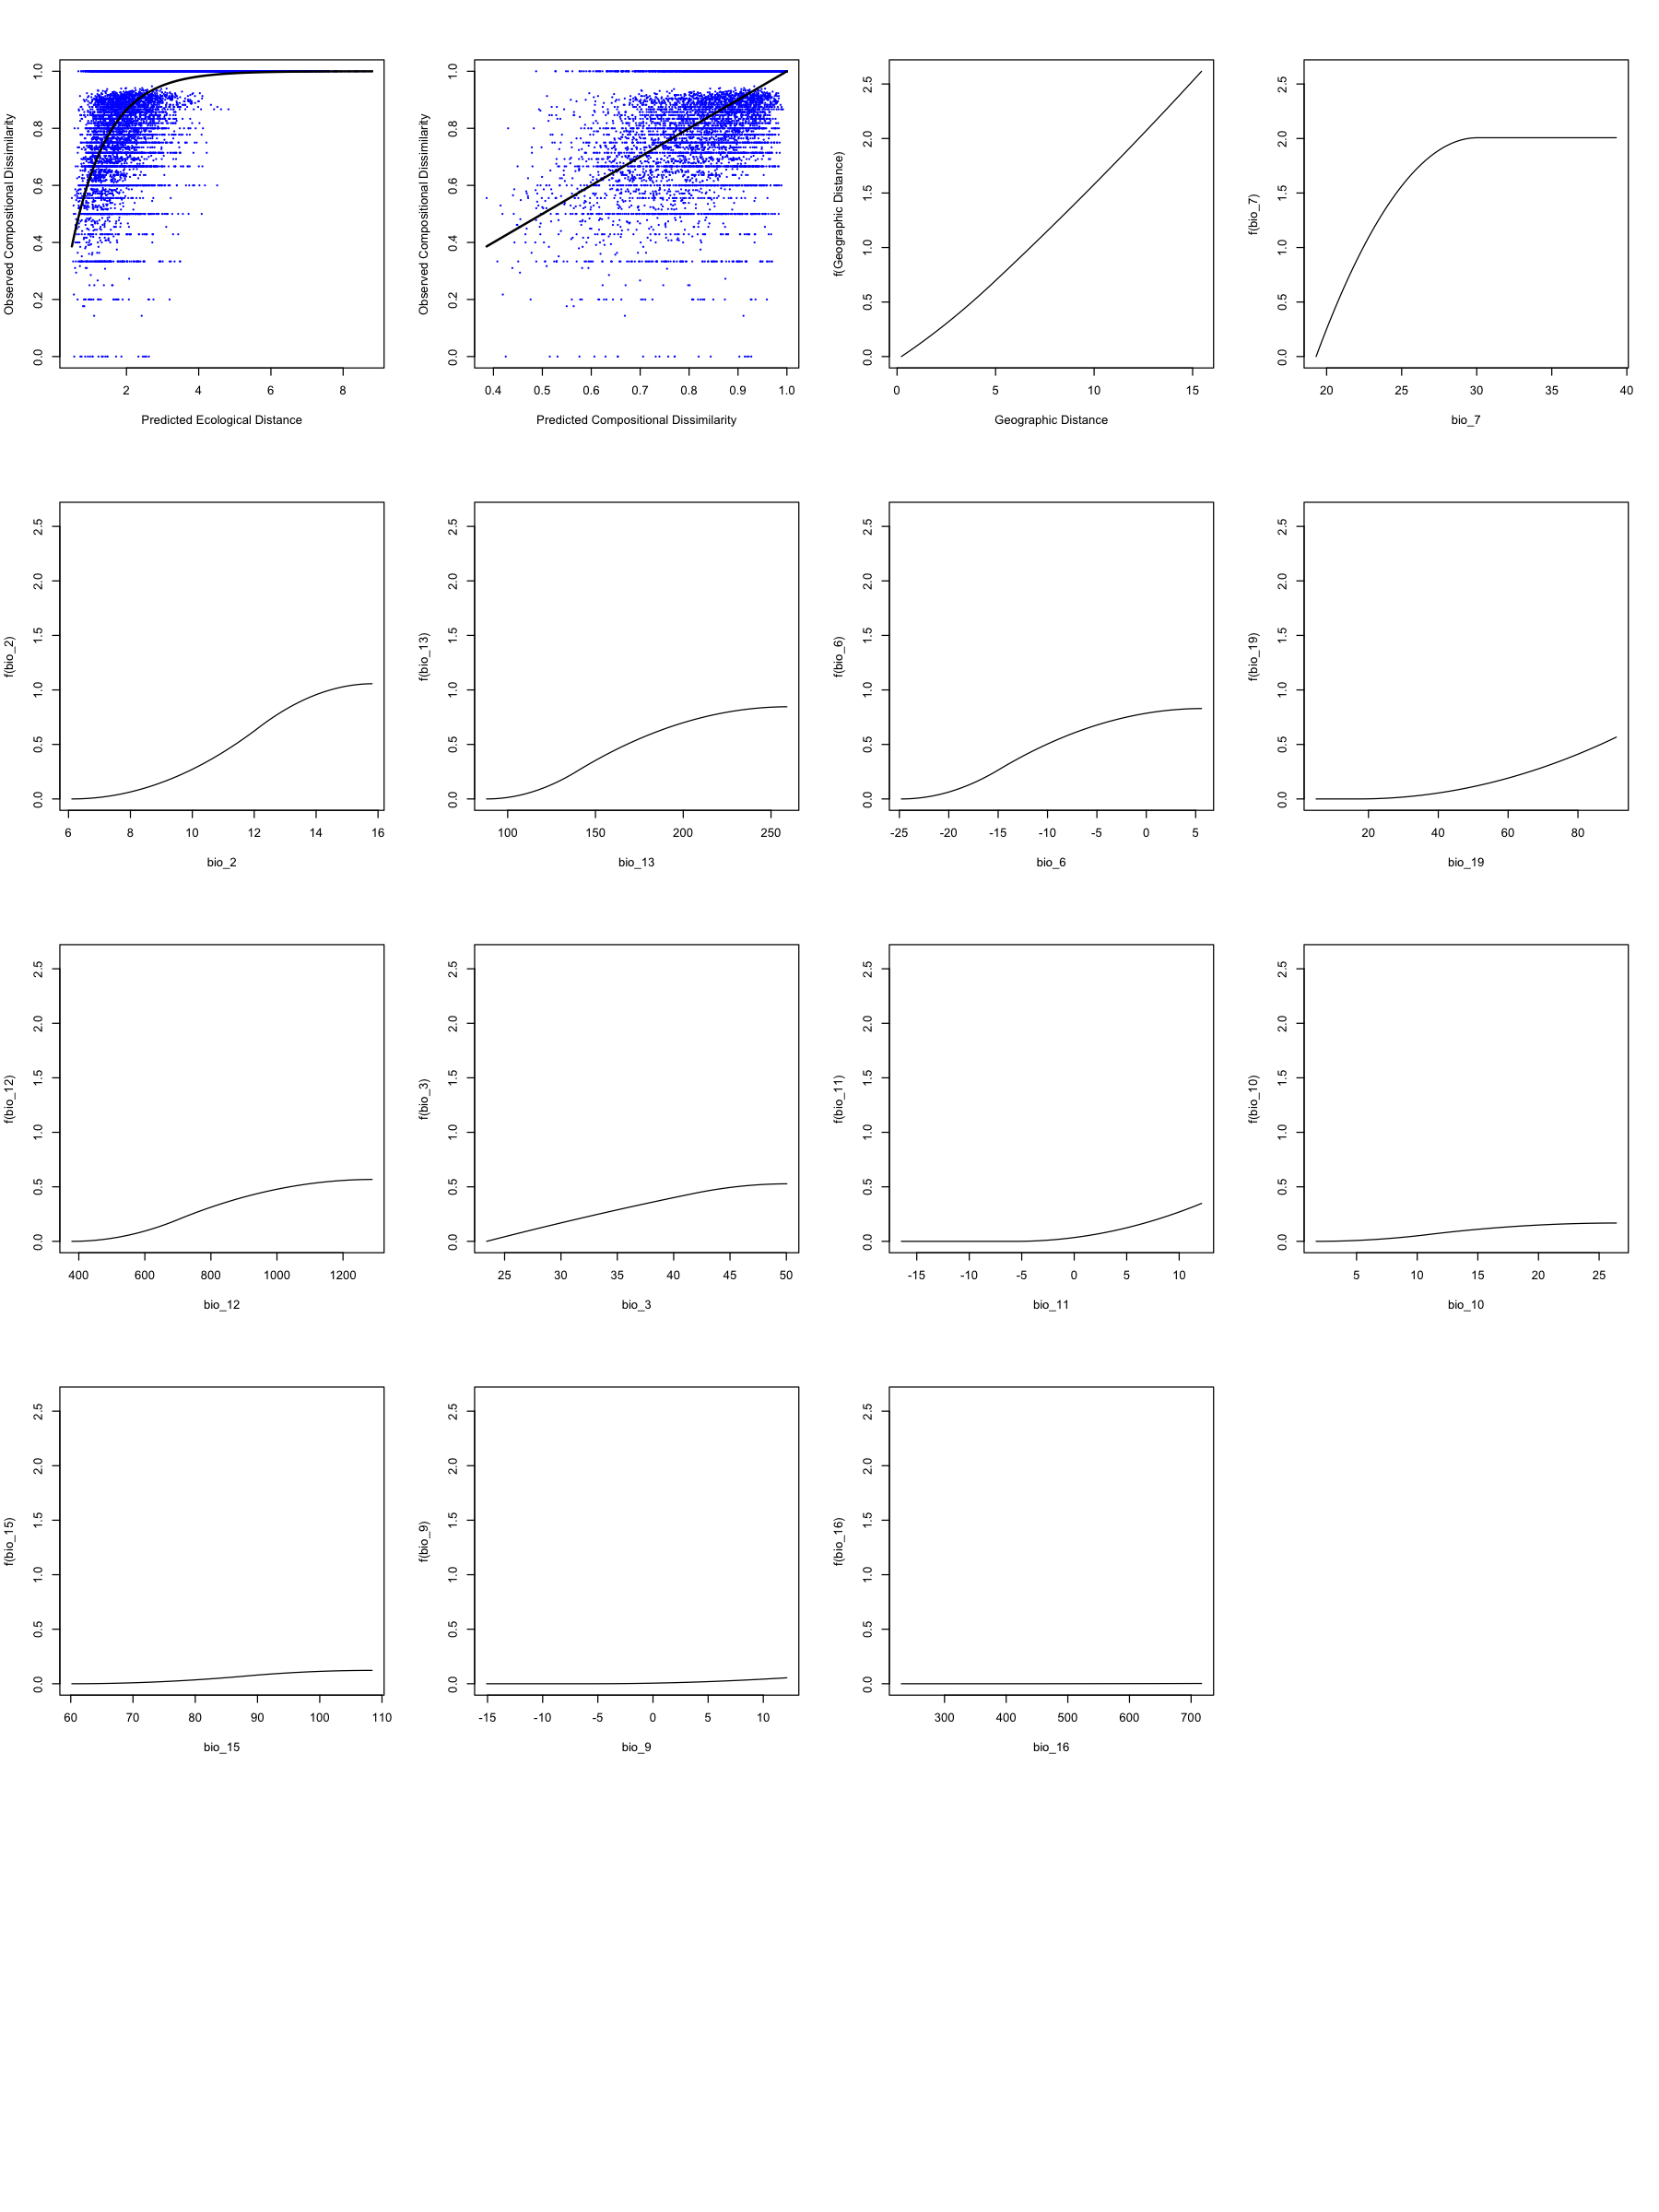

In [8]:
options(repr.plot.width = 15, repr.plot.height = 20)
plot(gdmRastMod, plot.layout=c(5,4))

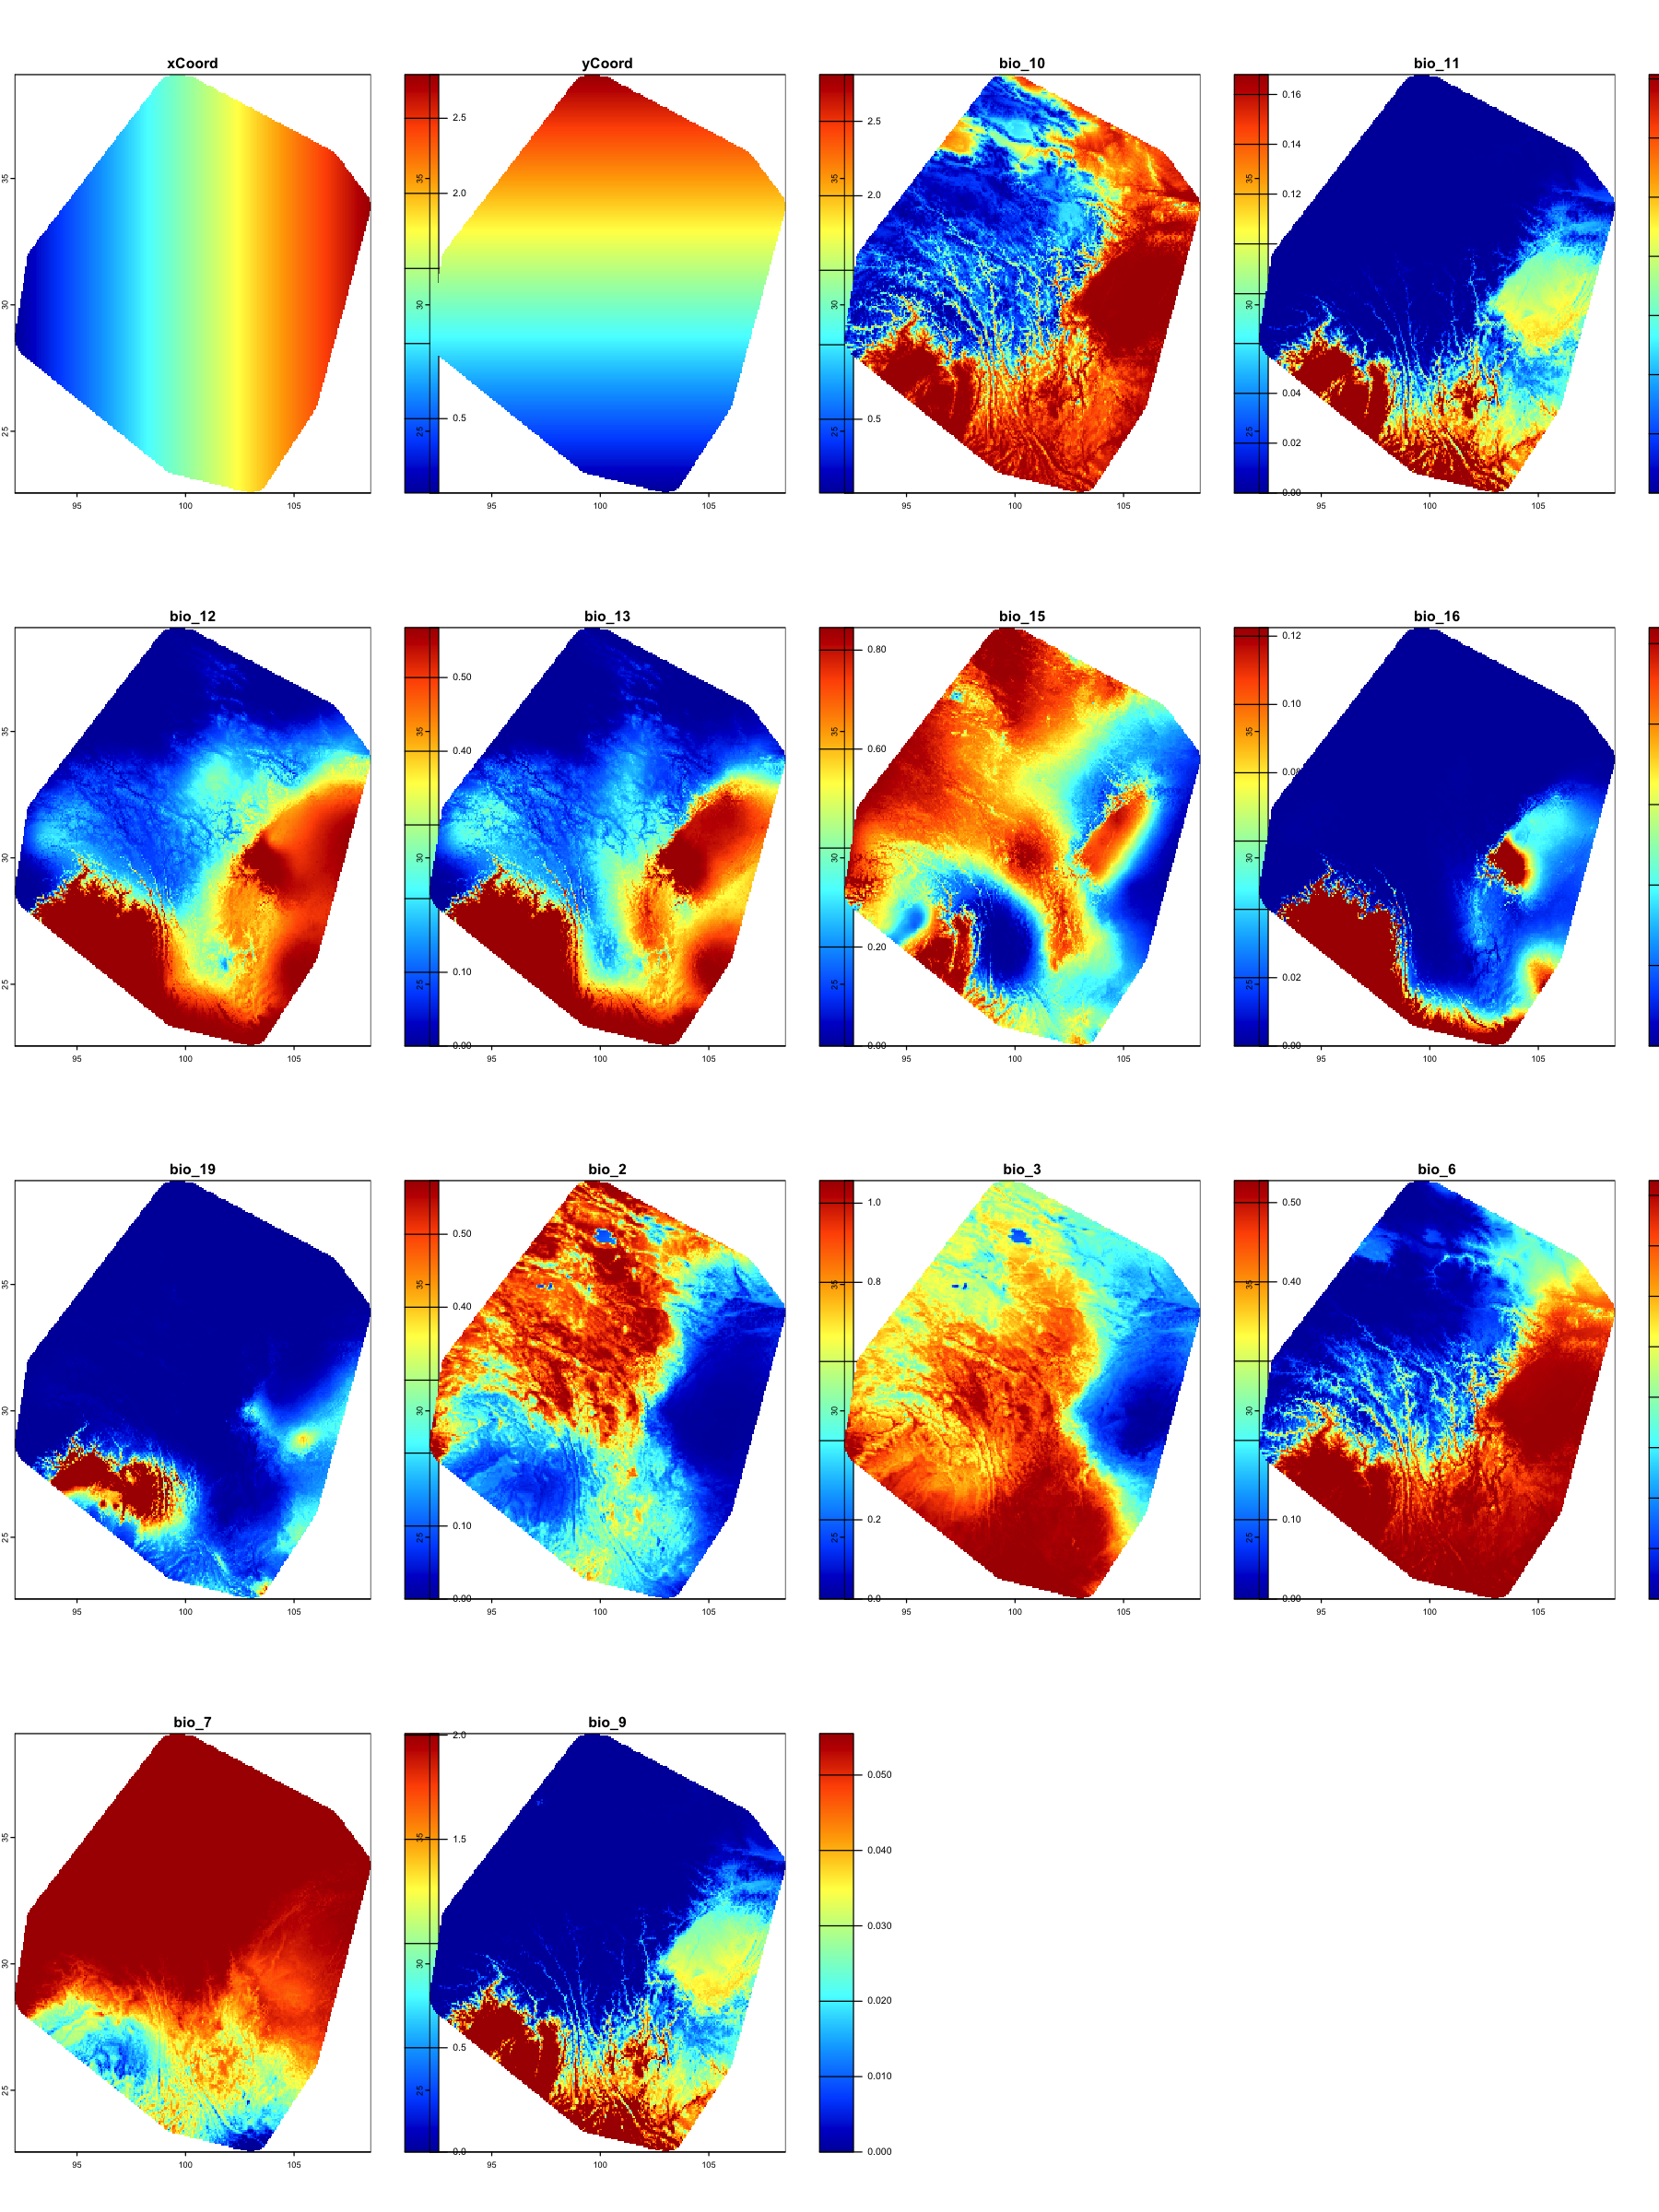

In [9]:
transRasts <- gdm.transform(model=gdmRastMod, data=rasters)
terra::plot(transRasts, col=rgb.tables(1000))

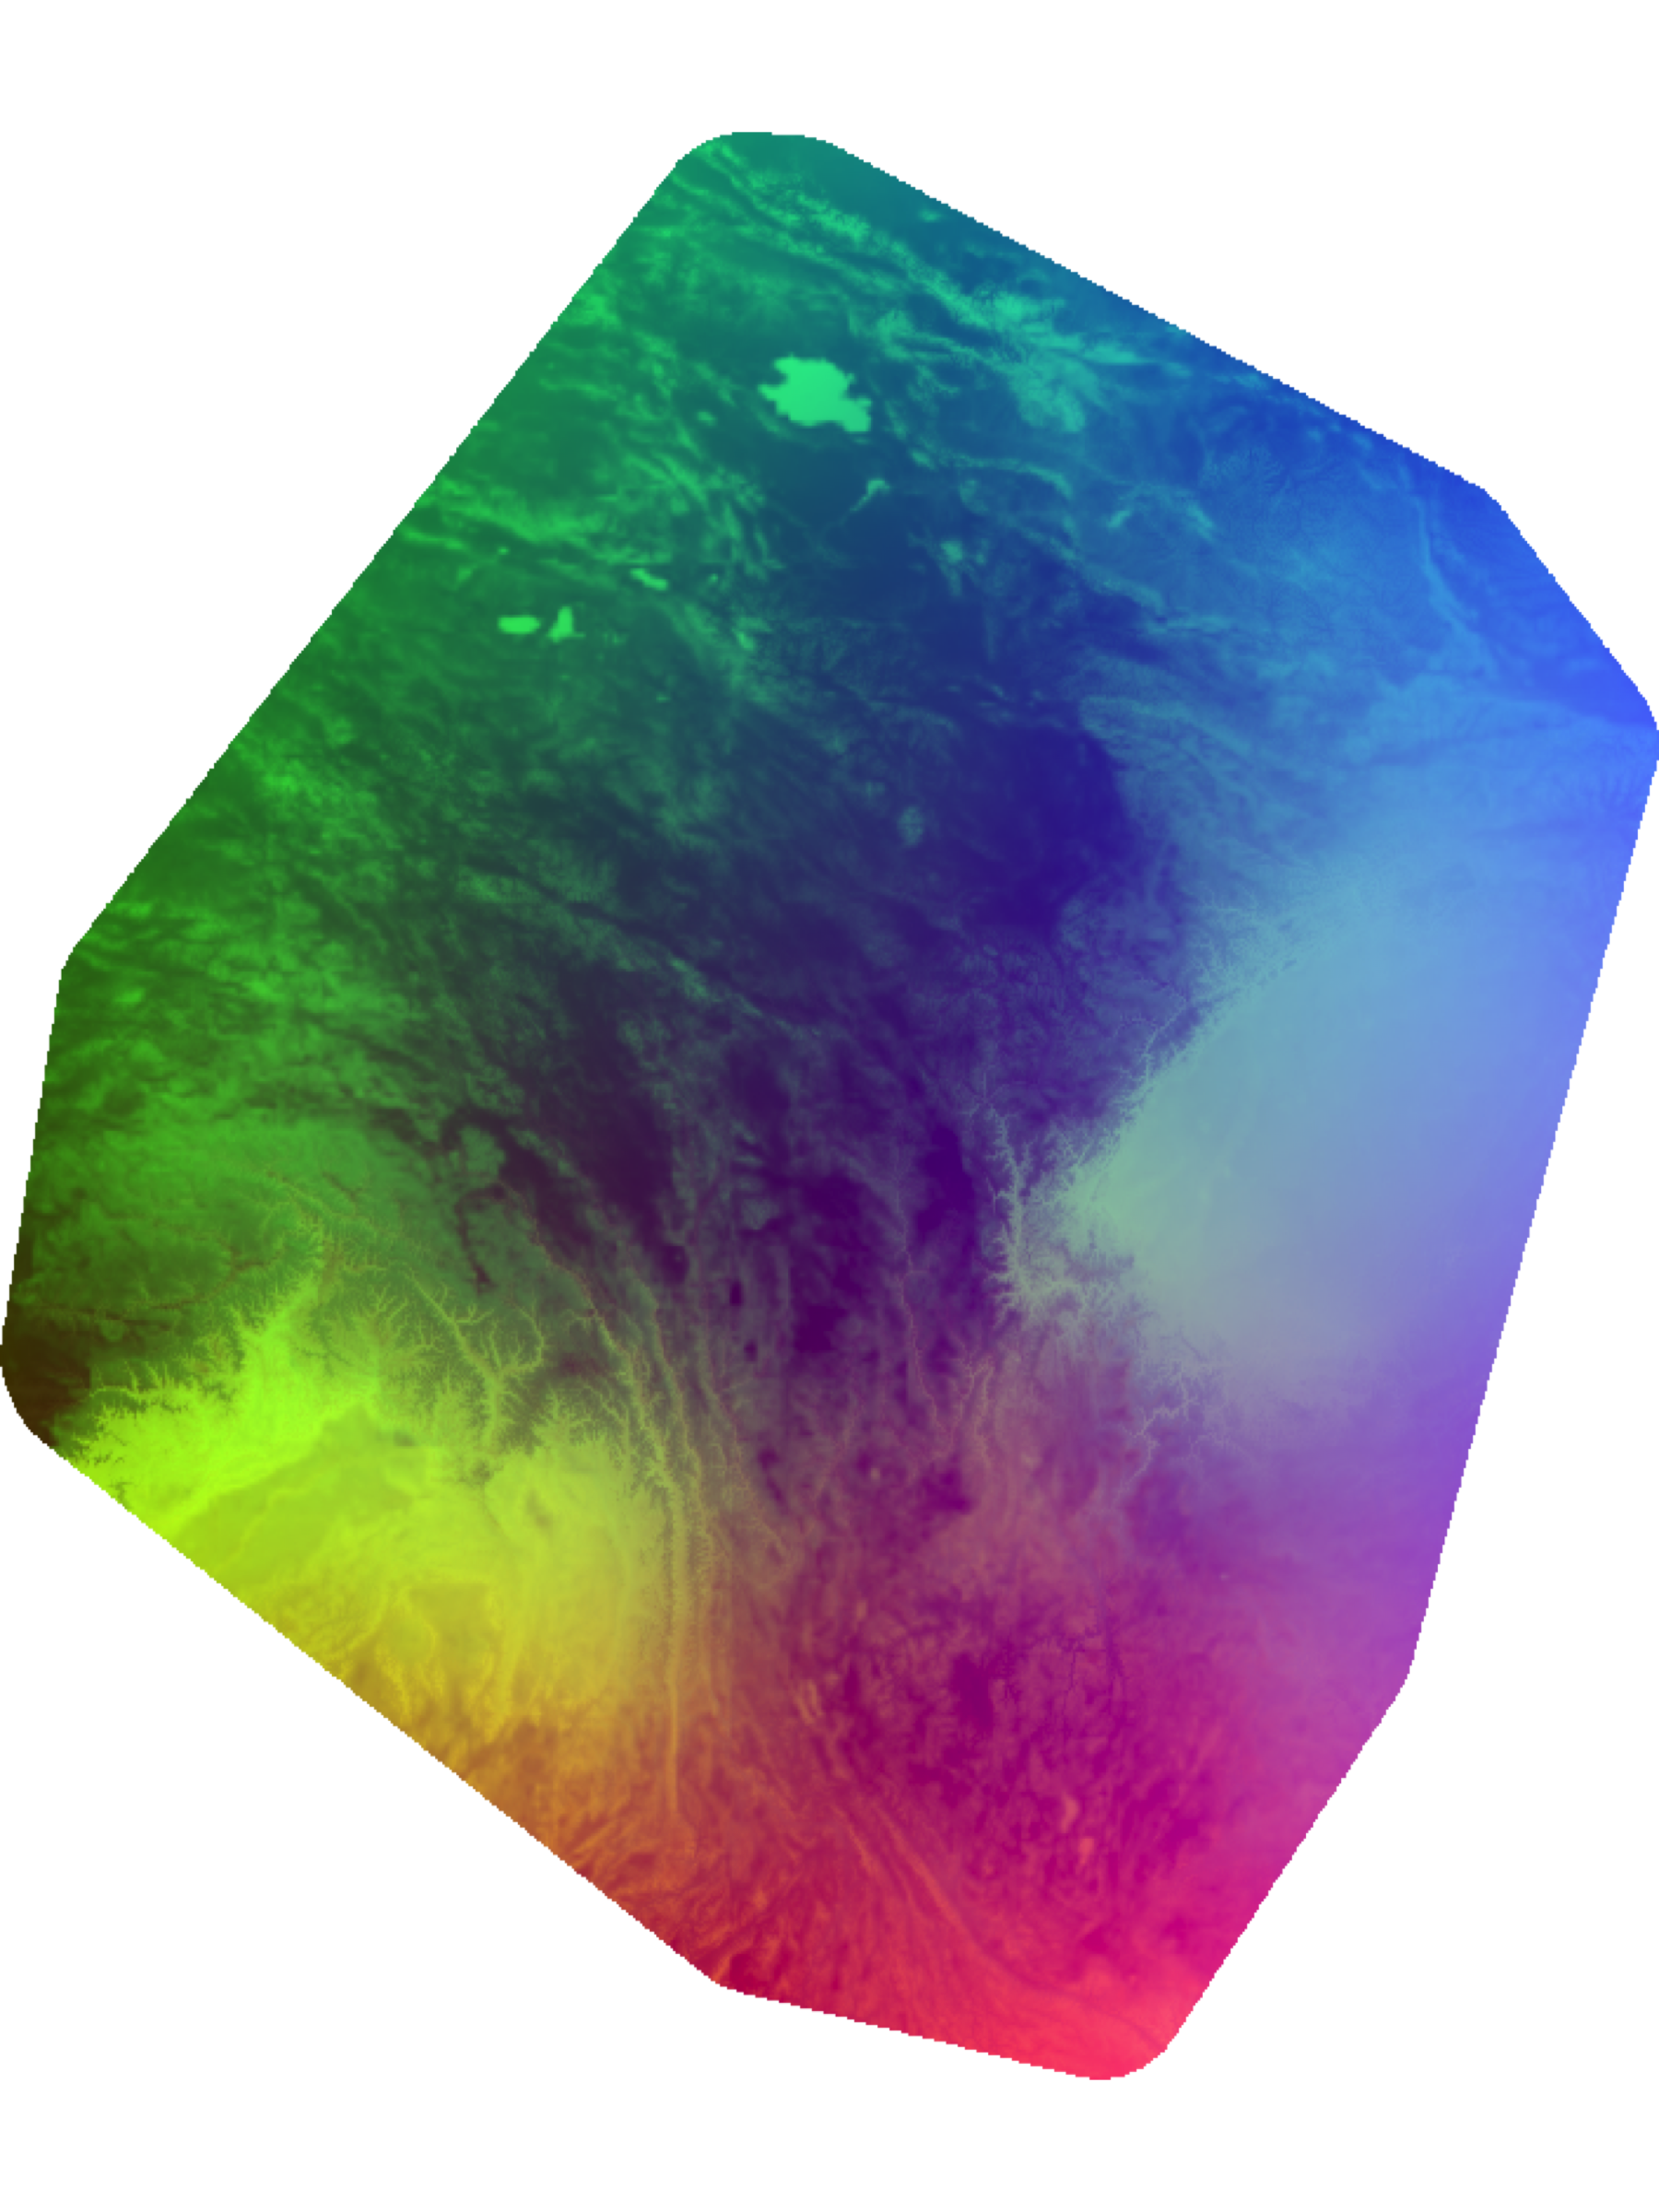

In [30]:
# Perform the principle components analysis on the gdm transformed rasters
pcaSamp <- terra::prcomp(transRasts, maxcell = 5e5)
 
# Predict the first three principle components for every cell in the rasters
# note the use of the 'index' argument
pcaRast <- terra::predict(transRasts, pcaSamp, index=1:3)

# Stretch the PCA rasters to make full use of the colour spectrum
pcaRast <- terra::stretch(pcaRast)

# Plot the three PCA rasters simultaneously, each representing a different colour 
#  (red, green, blue)
terra::plotRGB(pcaRast, r=1, g=3, b=2)

## Using the sample data directly
This is another method for doing the GDM that I believe is identical but that takes the input data in a different format. I think I got hung up with doing the spatial projection using this method so I transitioned to the sitexspecies method above.

In [ ]:
sppTab <- read.csv("samples.csv")
sppTab <- subset(sppTab, select = -c(Longitude, Latitude))
envTab <-read.csv("sites.csv")
sppTab

In [ ]:
gdmTab <- formatsitepair(bioData=sppTab, 
                         bioFormat=2, #x-y spp list
                         XColumn="Longitude", 
                         YColumn="Latitude",
                         sppColumn="Name", 
                         siteColumn="cluster", 
                         predData=envTab)
head(gdmTab)

gdm.1 <- gdm(data=gdmTab, geo=TRUE)
summary(gdm.1)

# IGNORE

In [21]:
point <- data.frame(lon = 85.42553, lat = 28.50715)
# Convert to SpatVector
pnt <- vect(point, geom = c("lon", "lat"), crs = "EPSG:4326") 
values <- extract(rasters, pnt)
print(values)

  ID wc2.1_10m_bio_1 wc2.1_10m_bio_10 wc2.1_10m_bio_11 wc2.1_10m_bio_12
1  1       -3.331677             3.48        -10.46783              343
  wc2.1_10m_bio_13 wc2.1_10m_bio_14 wc2.1_10m_bio_15 wc2.1_10m_bio_16
1               51                8         47.29009              130
  wc2.1_10m_bio_17 wc2.1_10m_bio_18 wc2.1_10m_bio_19 wc2.1_10m_bio_2
1               38               65              128        11.00848
  wc2.1_10m_bio_3 wc2.1_10m_bio_4 wc2.1_10m_bio_5 wc2.1_10m_bio_6
1        42.42189        575.4952           8.202         -17.748
  wc2.1_10m_bio_7 wc2.1_10m_bio_8 wc2.1_10m_bio_9
1           25.95       -9.771334      -0.3426251


In [20]:
summary(rasters)

Warning message:
“[summary] used a sample”


 wc2.1_10m_bio_1  wc2.1_10m_bio_10 wc2.1_10m_bio_11 wc2.1_10m_bio_12
 Min.   :-54.72   Min.   :-37.72   Min.   :-66.19   Min.   :   0.0  
 1st Qu.:-22.81   1st Qu.:-10.58   1st Qu.:-34.22   1st Qu.: 110.0  
 Median : -0.53   Median : 13.82   Median :-15.20   Median : 337.0  
 Mean   : -4.05   Mean   :  7.19   Mean   :-13.90   Mean   : 550.3  
 3rd Qu.: 19.02   3rd Qu.: 24.80   3rd Qu.: 12.13   3rd Qu.: 690.0  
 Max.   : 30.71   Max.   : 38.18   Max.   : 28.62   Max.   :7011.0  
 NA's   :65591    NA's   :65591    NA's   :65591    NA's   :65591   
 wc2.1_10m_bio_13 wc2.1_10m_bio_14 wc2.1_10m_bio_15 wc2.1_10m_bio_16
 Min.   :   0.0   Min.   :  0.00   Min.   :  0.00   Min.   :   0.0  
 1st Qu.:  28.0   1st Qu.:  0.00   1st Qu.: 41.41   1st Qu.:  56.0  
 Median :  60.0   Median :  5.00   Median : 64.80   Median : 152.0  
 Mean   :  93.5   Mean   : 15.39   Mean   : 74.63   Mean   : 241.8  
 3rd Qu.: 112.0   3rd Qu.: 18.00   3rd Qu.:100.13   3rd Qu.: 298.0  
 Max.   :1965.0   Max.   :471.00  